In [60]:
import numpy as np
import loader; 
import sklearn_classifiers
import keras_classifiers
import utils

import matplotlib.pyplot as plt
%matplotlib inline




import importlib;
importlib.reload(loader); 
importlib.reload(sklearn_classifiers);
importlib.reload(utils);
importlib.reload(keras_classifiers);



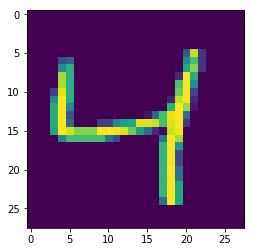

In [16]:
plt.imshow(x_train[2].reshape(28,28));
plt.savefig('number_04.png')

In [66]:
x_train.shape

(60000, 28, 28)

## 1. Random Forest on Raw data

In [14]:
%%time
# load data
(x_train, y_train, x_test, y_test) = loader.load_mnist_data(normalize = 0, squeeze = 1)

# transform 3D data into 2D data. (rows = cases, columns = voxels)
Xtrain, Xtest = utils.images_to_matrix(x_train, x_test)

# train RandomForest and test its performance
tree_model = sklearn_classifiers.fit_ExtraTrees(Xtrain, y_train, Xtest, y_test, n_estimators = 64);

Data is NOT normalized
x_train shape: (60000, 784)
60000 train samples
10000 test samples
             precision    recall  f1-score   support

          0       0.97      0.99      0.98       980
          1       0.99      0.99      0.99      1135
          2       0.97      0.97      0.97      1032
          3       0.97      0.97      0.97      1010
          4       0.98      0.97      0.98       982
          5       0.98      0.97      0.97       892
          6       0.97      0.98      0.98       958
          7       0.97      0.96      0.97      1028
          8       0.97      0.96      0.97       974
          9       0.96      0.96      0.96      1009

avg / total       0.97      0.97      0.97     10000

CPU times: user 1min 16s, sys: 991 ms, total: 1min 17s
Wall time: 11.5 s


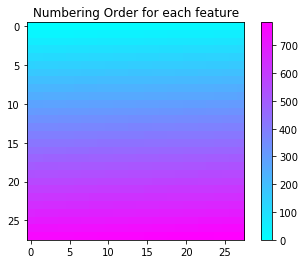

In [32]:
plt.imshow(np.arange(0,784).reshape(28,28),cmap='cool');
plt.colorbar();
plt.title('Numbering Order for each feature');

(array([ 524.,  114.,   76.,   49.,   17.,    2.,    1.,    0.,    0.,    1.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

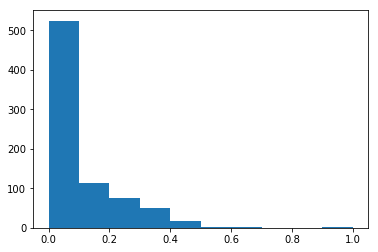

In [40]:
Y = tree_model.feature_importances_ / np.max(tree_model.feature_importances_)
plt.hist(Y)

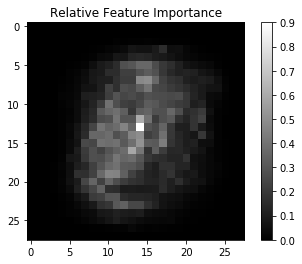

In [49]:
Y = tree_model.feature_importances_ / np.max(tree_model.feature_importances_)
Y = Y.reshape(28,28)
plt.imshow(Y,cmap='gray', vmin = 0.0, vmax = 0.9); plt.colorbar();
plt.title('Relative Feature Importance');

## X.  Randomized decision trees on DHash data

In [52]:
%%time
# load data
(x_train, y_train, x_test, y_test) = loader.load_mnist_data(normalize = 0, squeeze = 1)

# transform each image into a binary Dhash (columns and rows)
hash_size = 8
X_train_dhash = utils.Images_to_DHash(x_train * 2, size = hash_size); # normalization is not beneficial
X_test_dhash = utils.Images_to_DHash(x_test * 2, size = hash_size);   # normalization is not beneficial

Data is NOT normalized
CPU times: user 12.4 s, sys: 155 ms, total: 12.5 s
Wall time: 12.5 s


In [53]:
# train RandomForest and test its performance
importlib.reload(sklearn_classifiers);
tree = sklearn_classifiers.fit_ExtraTrees(X_train_dhash, y_train, X_test_dhash, y_test,
                                                                           n_estimators = 64);

x_train shape: (60000, 128)
60000 train samples
10000 test samples
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       980
          1       0.98      0.98      0.98      1135
          2       0.95      0.95      0.95      1032
          3       0.92      0.93      0.93      1010
          4       0.95      0.94      0.94       982
          5       0.94      0.93      0.94       892
          6       0.97      0.97      0.97       958
          7       0.96      0.94      0.95      1028
          8       0.93      0.92      0.92       974
          9       0.93      0.93      0.93      1009

avg / total       0.95      0.95      0.95     10000



In [54]:
tree.n_features_


128

## 2. Random Forest on DHash data

In [55]:
%%time
# load data
(x_train, y_train, x_test, y_test) = loader.load_mnist_data(normalize = 0, squeeze = 1)

# transform each image into a binary Dhash (columns and rows)
X_train_dhash = utils.Images_to_DHash(x_train * 2, size = hash_size); # normalization is not beneficial
X_test_dhash = utils.Images_to_DHash(x_test * 2, size = hash_size);   # normalization is not beneficial

# train RandomForest and test its performance
tree = sklearn_classifiers.fit_RandomForest(X_train_dhash, y_train, X_test_dhash, y_test, n_estimators = hash_size**2);

Data is NOT normalized
x_train shape: (60000, 128)
60000 train samples
10000 test samples
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       980
          1       0.98      0.98      0.98      1135
          2       0.94      0.95      0.94      1032
          3       0.93      0.93      0.93      1010
          4       0.94      0.94      0.94       982
          5       0.93      0.92      0.93       892
          6       0.95      0.97      0.96       958
          7       0.95      0.93      0.94      1028
          8       0.93      0.91      0.92       974
          9       0.93      0.91      0.92      1009

avg / total       0.94      0.94      0.94     10000

CPU times: user 31.1 s, sys: 1.15 s, total: 32.2 s
Wall time: 16.2 s


## 3. Neural Net on DHash data

In [62]:
%%time
importlib.reload(keras_classifiers);
model = keras_classifiers.fit_two_layer_NN(X_train_dhash, X_test_dhash, y_train, y_test, 
                                           num_epochs = 400, verbose_out = 0);
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 12)                1548      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                130       
Total params: 18,190
Trainable params: 18,190
Non-trainable params: 0
_________________________________________________________________
None
Test score: 0.222553068413
Test accurracy: 0.9395
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 12)                1548      
_________________

## 4. Neural Net on Raw Data

In [64]:
(x_train, y_train, x_test, y_test) = loader.load_mnist_data(normalize = 1, squeeze = 1)
# transform 3D data into 2D data. (rows = cases, columns = voxels)
Xtrain, Xtest = utils.images_to_matrix(x_train, x_test)

In [65]:
%%time
model = keras_classifiers.fit_two_layer_NN(Xtrain, Xtest, y_train, y_test, 
                                           num_epochs = 400, verbose_out = 0);
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 78)                61230     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                790       
Total params: 677,460
Trainable params: 677,460
Non-trainable params: 0
_________________________________________________________________
None


KeyboardInterrupt: 